In [46]:
from xspec import *
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import os,sys
import extinction
sys.path.append('/Users/liruancun/Works/BH/')
sys.path.append('/Users/liruancun/Works/accretion/')
import Spectra as spe
import Profiles as Pro
import Constant as C
plt.style.use("classic")
plt.rc('font',family='Times New Roman')


In [2]:
Plot.device = "/xs"
Plot.xAxis = "keV"
Plot.add = True
Plot.xLog = True
Plot.yLog = True


In [7]:
m1=Model("optxagn")
pars=[1e7,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux1 =[]
callModelFunction('optxagn',x.tolist(),pars,flux1)
flux1=np.array(flux1)


In [8]:
fittingpath = '/Users/liruancun/Works/PG/'
s0=Table.read('/Users/liruancun/Works/1ES1927p654/1ES1927+654_op.txt',format='ascii')
sfake=spe.fake_spec(s0,[0.0005,0.2],number=2000,unit='keV',method='log')
spe.unitchange(sfake,fittingpath,'fake')
fname=fittingpath+'fake.sh'
fobj=open(fname,'w')    
fobj.write('export HEADASNOQUERY= \n')
fobj.write('export HEADASPROMPT=/dev/null \n')
fobj.write('flx2xsp {0}fake.txt {0}fake.pha {0}fake.rsp'.format(fittingpath)+'\n')
fobj.close()
os.system('chmod +x {0}fake.sh'.format(fittingpath))
os.system('. {0}fake.sh'.format(fittingpath))
os.chdir(fittingpath)   
AllData.clear()
AllData('1:1 '+fittingpath+'fake.pha')


In [9]:
m1=Model("optxagn")
par_bb=[]
lenpar=14
par_bb.append('init')
for loopp in range(lenpar):
    par_bb.append(m1(loopp+1))
    

In [10]:
par_bb[5].values=[1.,0.01,0.1,0.1,10,10]
par_bb[6].values=[-1,0.01,-1,-1,10,10]
par_bb[10].values=[0.5,0.01,0.1,0.1,10,10]
par_bb[11].values=1.0
m1.show()


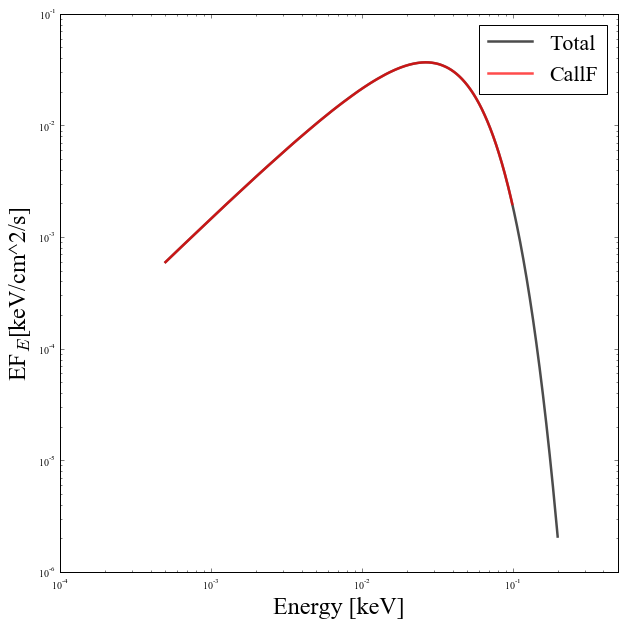

In [11]:
fig = plt.figure(figsize=(10, 10))
Plot('eemodel')
xdata=np.array(Plot.x(1))
moc=np.array(Plot.model(1))
plt.plot(xdata, moc,c='k',label='Total',alpha=0.7,linewidth=2.5)
plt.plot(txmin, flux1*txmin*txmin/tdx,c='r',label='CallF',alpha=0.7,linewidth=2.5)
plt.xlabel('Energy [keV]', fontsize=24)
plt.ylabel(r'EF$_E$[keV/cm^2/s]', fontsize=24)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-4,0.5])
#plt.ylim([1e-4,0.1])
plt.show()

In [20]:
print (spe.hc2/0.025)

495.936772


In [31]:
print (flux1)
data = spe.EE_to_lFl([xdata, moc])

flux1/tdx



[3.15926340e-03 3.16190347e-03 3.16438172e-03 ... 5.45947041e-05
 5.36128573e-05 5.26433578e-05]


array([2.38194909e+03, 2.37763251e+03, 2.37320074e+03, ...,
       2.08002818e-01, 2.03721629e-01, 1.99508432e-01])

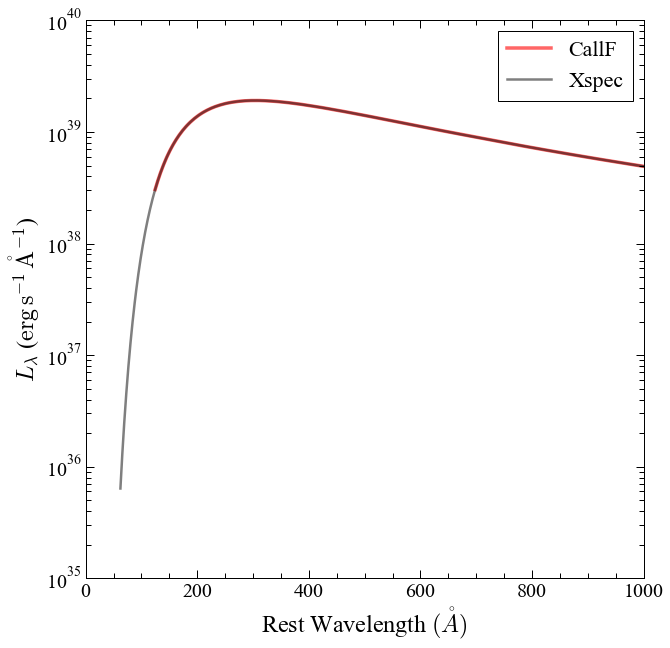

In [38]:
fig = plt.figure(figsize=(10, 10))
fluxEE = flux1*txmin*txmin/tdx
plt.plot(xmin,fluxEE[::-1]/(spe.hc3*xmin)*facdis,color = 'r',label=r'CallF',lw=3.5,alpha=0.6)
plt.plot(data[0],data[1]*facdis,color = 'k',label=r'Xspec',lw=2.5,alpha=0.5)
plt.xlim([0,1000])
plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()


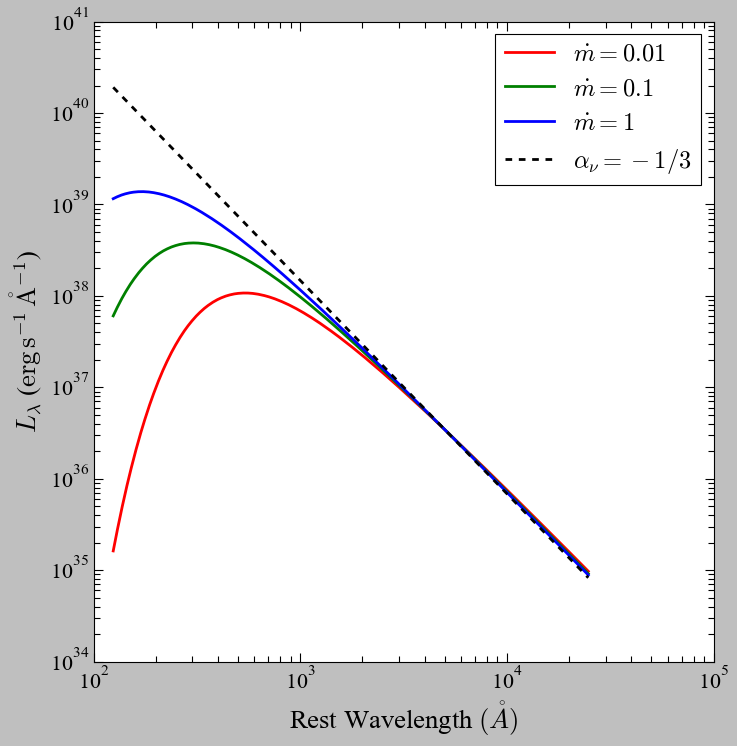

In [51]:
pars=[1e7,100,-2,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux1=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e7,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux2=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e7,100,0,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux3=fluxEE[::-1]/(spe.hc3*xmin)*facdis
norm2 = flux1[1402]/flux2[1402]
norm3 = flux1[1402]/flux3[1402]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1,color = 'r',label=r'$\dot{m} = 0.01$',lw=2.5)
plt.plot(xmin,flux2*norm2,color = 'g',label=r'$\dot{m} = 0.1$',lw=2.5)
plt.plot(xmin,flux3*norm3,color = 'b',label=r'$\dot{m} = 1$',lw=2.5)
plt.plot(xmin,Pro.spowerlaw(xmin,flux1[1402],2.+1/3.),color = 'k',label=r'$\alpha_\nu = -1/3$',lw=2.5,linestyle='--')
#plt.ylim([3000,8000])
plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()


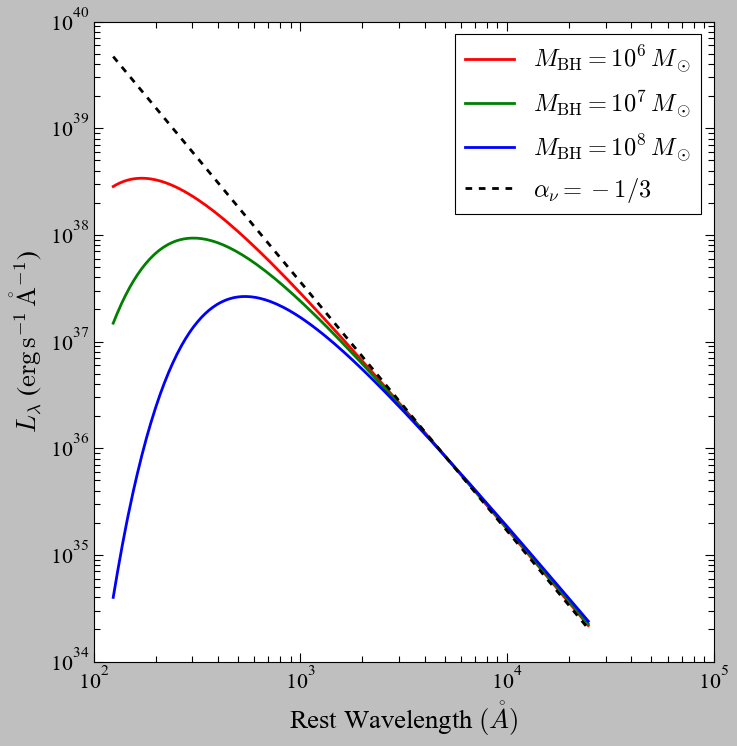

In [52]:
pars=[1e6,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux1=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e7,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux2=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e8,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux3=fluxEE[::-1]/(spe.hc3*xmin)*facdis
norm2 = flux1[1402]/flux2[1402]
norm3 = flux1[1402]/flux3[1402]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1,color = 'r',label=r'$M_\mathrm{BH} = 10^6 \, M_\odot$',lw=2.5)
plt.plot(xmin,flux2*norm2,color = 'g',label=r'$M_\mathrm{BH} = 10^7 \, M_\odot$',lw=2.5)
plt.plot(xmin,flux3*norm3,color = 'b',label=r'$M_\mathrm{BH} = 10^8 \, M_\odot$',lw=2.5)
plt.plot(xmin,Pro.spowerlaw(xmin,flux1[1402],2.+1/3.),color = 'k',label=r'$\alpha_\nu = -1/3$',lw=2.5,linestyle='--')
#plt.ylim([3000,8000])
plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()


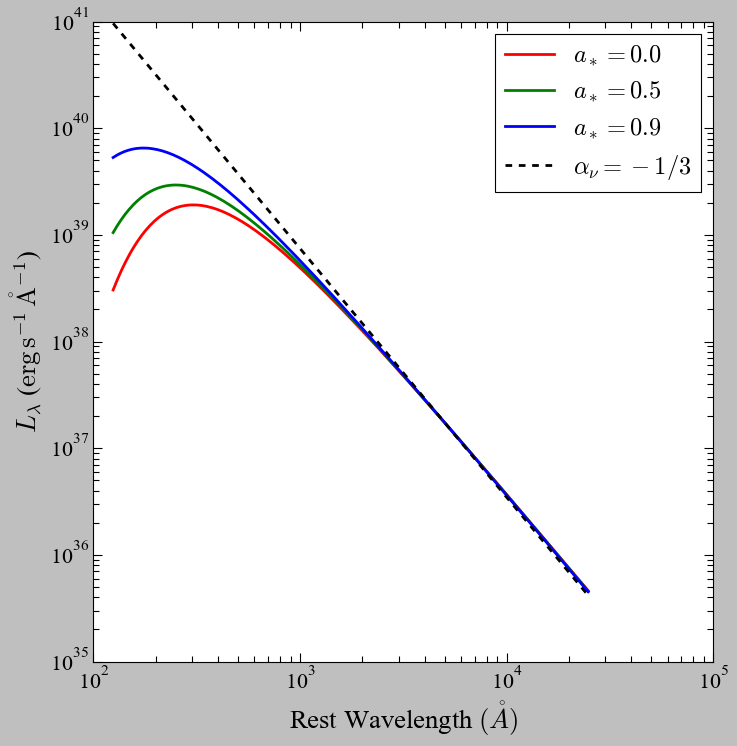

In [53]:
pars=[1e7,100,-1,0.0,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux1=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e7,100,-1,0.5,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux2=fluxEE[::-1]/(spe.hc3*xmin)*facdis
pars=[1e7,100,-1,0.9,1.,-1,0.2,10,2.1,0.5,1.0,1e5,0.0]
flux0 =[]
callModelFunction('optxagn',x.tolist(),pars,flux0)
fluxEE = np.array(flux0)*txmin*txmin/tdx
flux3=fluxEE[::-1]/(spe.hc3*xmin)*facdis
norm2 = flux1[1402]/flux2[1402]
norm3 = flux1[1402]/flux3[1402]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1,color = 'r',label=r'$a_\ast = 0.0$',lw=2.5)
plt.plot(xmin,flux2*norm2,color = 'g',label=r'$a_\ast = 0.5$',lw=2.5)
plt.plot(xmin,flux3*norm3,color = 'b',label=r'$a_\ast = 0.9$',lw=2.5)
plt.plot(xmin,Pro.spowerlaw(xmin,flux1[1402],2.+1/3.),color = 'k',label=r'$\alpha_\nu = -1/3$',lw=2.5,linestyle='--')
#plt.ylim([3000,8000])
plt.yscale('log')
plt.xscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()


In [30]:
engs = (.5, 1.5, 2.5, 3.5, 4.5, 5.5)   # can be a tuple or list
pars = [-1.0]    # tuple or list
flux = []       # must be a list
callModelFunction('powerlaw', engs, pars, flux) 
print (flux)

[1.0, 2.0, 3.0, 4.0, 5.0]


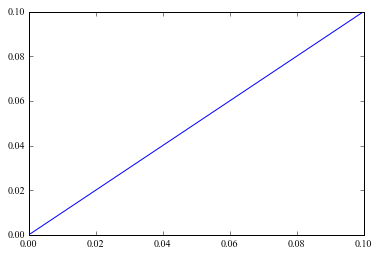

In [35]:
flux = []
callModelFunction('powerlaw',x.tolist(),pars,flux)
plt.plot(txmin,flux/tdx)
plt.show()

In [25]:
print (np.sum(flux1*facdis))

9.30834582966038e+52


In [2]:
m1=Model("agnsed")


In [37]:
s0=Table.read('/Users/liruancun/Works/1ES1927p654/1ES1927+654_op.txt',format='ascii')
sfake=spe.fake_spec(s0,[0.0005,0.01],number=2000,unit='keV',method='log')


In [7]:
pars=[1e7,100,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,0.5,1,5,10,1,0.0]


Exception: Error: parameter array size doesn't match number of parameters
       in optxagn: 13


In [9]:
print (len(pars))

15


In [8]:
print (2.066/12)

0.17216666666666666


In [3]:
sta=np.log(0.0005)
sto=np.log(0.1)
step=(sto-sta)/2000
xx=np.arange(sta,sto,step)
x=np.exp(xx)
tdx = x[1:2000]-x[0:1999]
txmin = 0.5*(x[1:2000]+x[0:1999])
xx=spe.hc2/x
xx = xx[::-1]
dx = xx[1:2000]-xx[0:1999]
xmin = 0.5*(xx[1:2000]+xx[0:1999])

In [5]:
from scipy.integrate import trapz
totflux = trapz(flux1,xmin)
totL = totflux * 4.*np.pi*(10.*1e6*C.pc)**2
facdis = 4.*np.pi*(10.*1e6*C.pc)**2
print (totL)

1.1852673506752245e+54


In [45]:
s=Table([xmin,flux],names=['wave','flux'])
print (spe.cal_F_plus(s,'sloan_u'))
print (spe.cal_F_plus(s,'sloan_r'))
print (spe.cal_F_plus(s,'sloan_z'))

1.020559961155692e-12
7.930882341512423e-13
5.772334825535756e-13


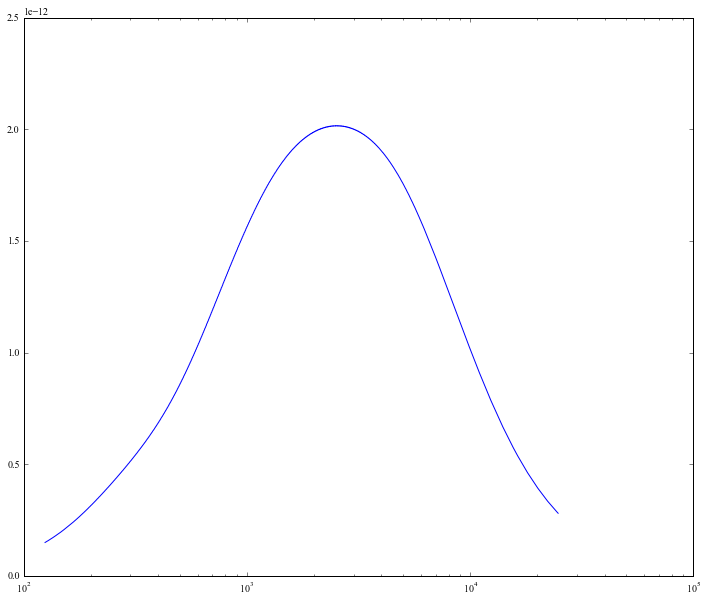

In [47]:
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,10,50,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
fig = plt.figure(figsize=(12, 10))
flux1=np.array(flux1)[::-1]
flux = flux1*(txmin/spe.hc3)/dx
data = [xmin,flux]
plt.plot(xmin,flux)
plt.xscale('log')
plt.show()

In [17]:
print (data)

[array([1.24908911e+00, 1.25528962e+00, 1.26152091e+00, ...,
       2.44918369e+04, 2.46134150e+04, 2.47355966e+04]), array([3.05213329e-14, 3.06109705e-14, 3.07409508e-14, ...,
       2.90843408e-11, 2.88542902e-11, 2.86171002e-11])]


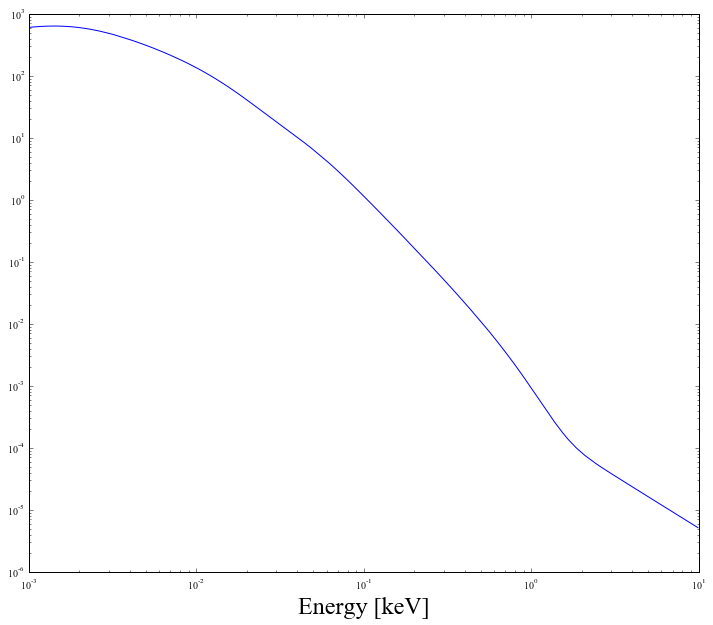

In [24]:
fig = plt.figure(figsize=(12, 10))
data2 = spe.lFl_to_EE(data)
plt.plot(data2[0],data2[1])
plt.xlim([1e-3,10.])
plt.xlabel('Energy [keV]', fontsize=24)
plt.xscale('log')
plt.yscale('log')
plt.show()

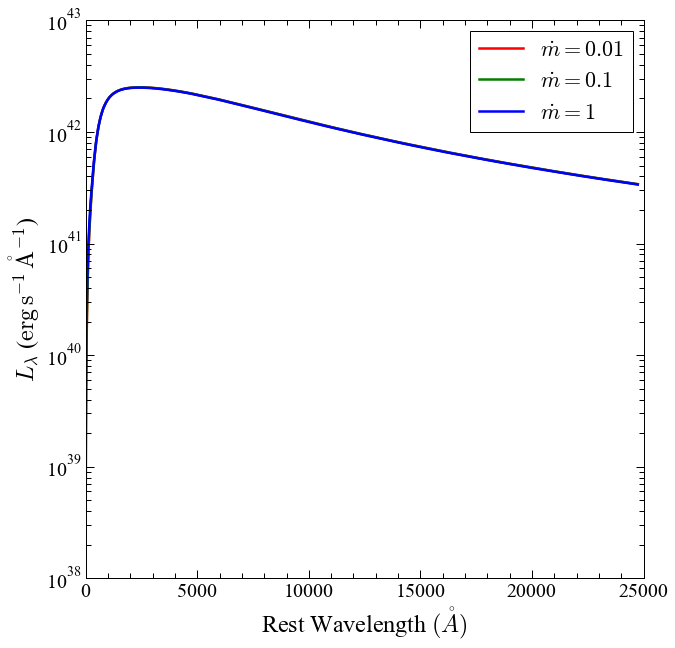

In [20]:
pars=[1e7,10,-1,0.0,np.cos(30.*np.pi/180.),100,0.2,1.7,2.7,20,40,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(60.*np.pi/180.),100,0.2,1.7,2.7,20,40,-1,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e7,10,-1,0.0,np.cos(80.*np.pi/180.),100,0.2,1.7,2.7,20,40,-1,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
norm2 = flux1[1312]/flux2[1312]
norm3 = flux1[1312]/flux3[1312]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*spe.hc3),color = 'r',label=r'$\dot{m} = 0.01$',lw=2.5)
plt.plot(xmin,flux2*txmin*facdis*norm2/(dx*spe.hc3),color = 'g',label=r'$\dot{m} = 0.1$',lw=2.5)
plt.plot(xmin,flux3*txmin*facdis*norm3/(dx*spe.hc3),color = 'b',label=r'$\dot{m} = 1$',lw=2.5)
#plt.ylim([3000,8000])
plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()

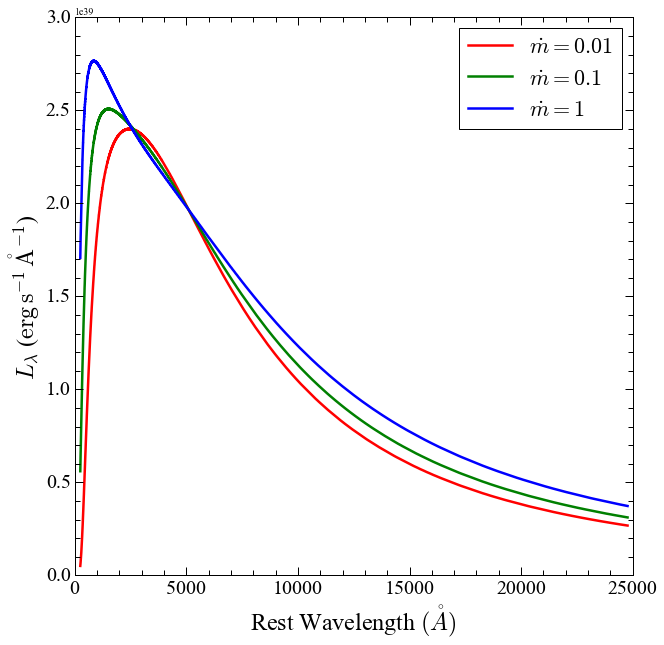

In [8]:
pars=[1e7,10,-2,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e7,10,0,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
norm2 = flux1[1312]/flux2[1312]
norm3 = flux1[1312]/flux3[1312]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*spe.hc3),color = 'r',label=r'$\dot{m} = 0.01$',lw=2.5)
plt.plot(xmin,flux2*txmin*facdis*norm2/(dx*spe.hc3),color = 'g',label=r'$\dot{m} = 0.1$',lw=2.5)
plt.plot(xmin,flux3*txmin*facdis*norm3/(dx*spe.hc3),color = 'b',label=r'$\dot{m} = 1$',lw=2.5)
#plt.ylim([3000,8000])
#plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
#plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()

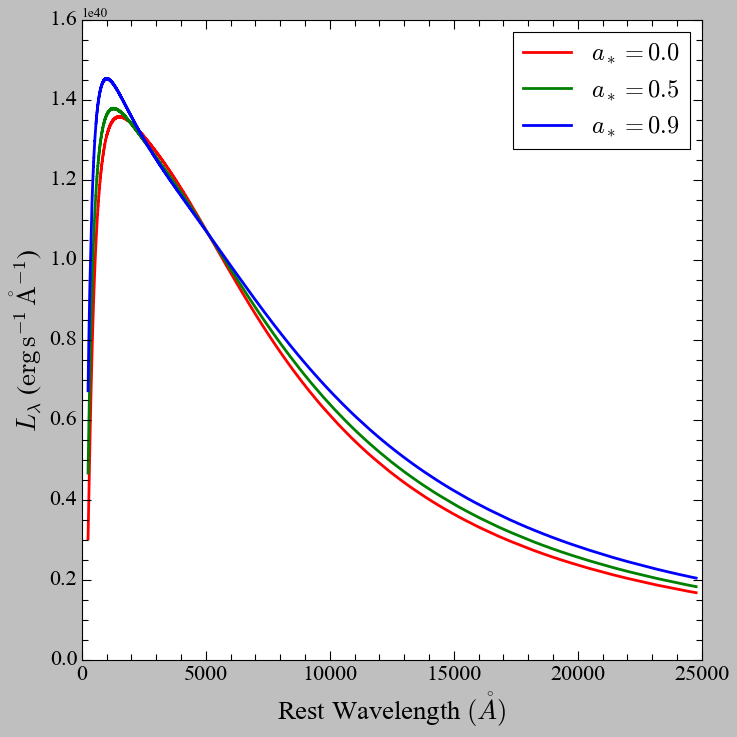

In [36]:
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.5,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e7,10,-1,0.9,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
norm2 = flux1[1312]/flux2[1312]
norm3 = flux1[1312]/flux3[1312]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*spe.hc3),color = 'r',label=r'$a_\ast = 0.0$',lw=2.5)
plt.plot(xmin,flux2*txmin*facdis*norm2/(dx*spe.hc3),color = 'g',label=r'$a_\ast = 0.5$',lw=2.5)
plt.plot(xmin,flux3*txmin*facdis*norm3/(dx*spe.hc3),color = 'b',label=r'$a_\ast = 0.9$',lw=2.5)
#plt.ylim([3000,8000])
#plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()

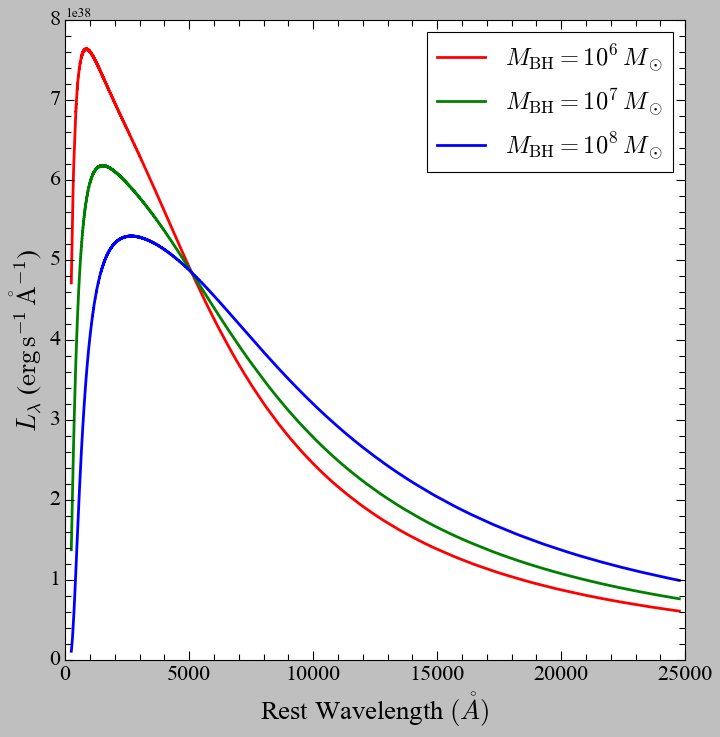

In [37]:
pars=[1e6,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e8,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
norm2 = flux1[1312]/flux2[1312]
norm3 = flux1[1312]/flux3[1312]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*spe.hc3),color = 'r',label=r'$M_\mathrm{BH} = 10^6 \, M_\odot$',lw=2.5)
plt.plot(xmin,flux2*txmin*facdis*norm2/(dx*spe.hc3),color = 'g',label=r'$M_\mathrm{BH} = 10^7 \, M_\odot$',lw=2.5)
plt.plot(xmin,flux3*txmin*facdis*norm3/(dx*spe.hc3),color = 'b',label=r'$M_\mathrm{BH} = 10^8 \, M_\odot$',lw=2.5)
#plt.ylim([3000,8000])
#plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()

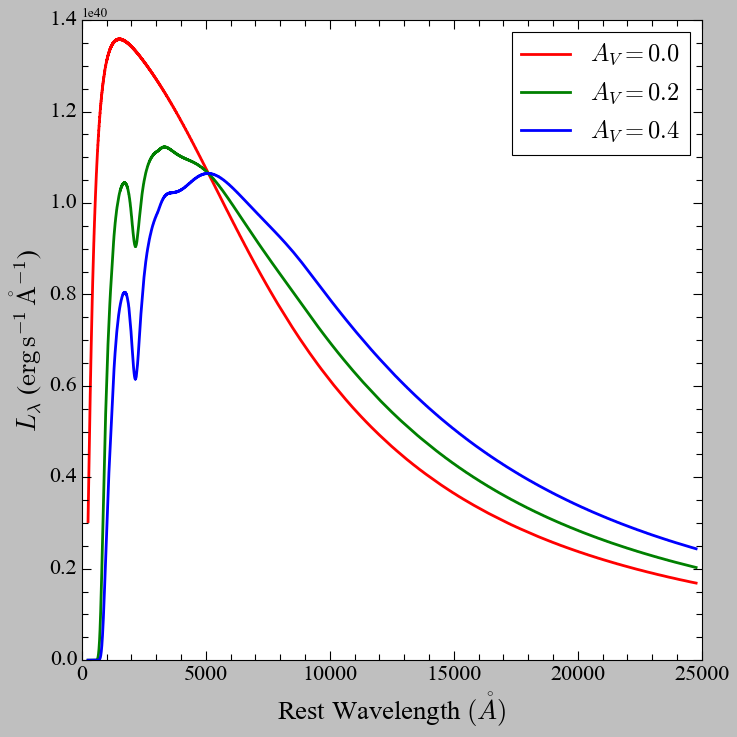

In [42]:
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]

av=0.2
cm=extinction.ccm89(xmin,av,3.1)
flux2 = flux1 / np.power(10,cm/(2.5))
av=0.4
cm=extinction.ccm89(xmin,av,3.1)
flux3 = flux1 / np.power(10,cm/(2.5))

norm2 = flux1[1312]/flux2[1312]
norm3 = flux1[1312]/flux3[1312]
fig = plt.figure(figsize=(10, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*spe.hc3),color = 'r',label=r'$A_V = 0.0$',lw=2.5)
plt.plot(xmin,flux2*txmin*facdis*norm2/(dx*spe.hc3),color = 'g',label=r'$A_V = 0.2$',lw=2.5)
plt.plot(xmin,flux3*txmin*facdis*norm3/(dx*spe.hc3),color = 'b',label=r'$A_V = 0.4$',lw=2.5)
#plt.ylim([3000,8000])
#plt.yscale('log')
ax = plt.gca()
ax.minorticks_on()
ax.tick_params(axis="both", which="major", length=8, labelsize=20, width=1.)
ax.tick_params(axis="both", which="minor", length=5, labelsize=20, width=1.)
plt.legend(loc='upper right',fontsize=22,numpoints=1)
plt.xlabel(r'Rest Wavelength $(\mathring{A})$', fontsize=24)
plt.ylabel(r'$L_\lambda$ ($\mathrm{erg\,s^{-1}\,\mathring{A}^{-1}}$)', fontsize=24)
plt.savefig('/Users/liruancun/Desktop/exp.png',dpi=200,bbox_inches='tight')
plt.show()

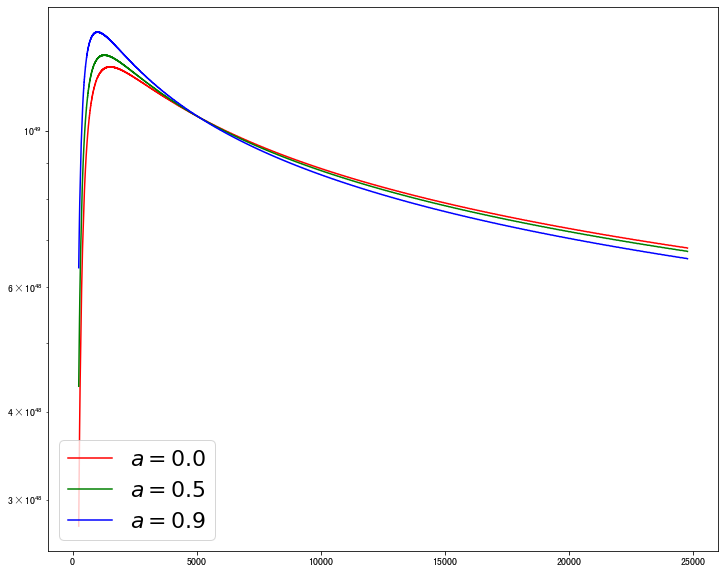

In [25]:
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.5,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e7,10,-1,0.9,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
fig = plt.figure(figsize=(12, 10))
plt.plot(xmin,flux1*txmin*facdis/(dx*flux1[1312]),color = 'r',label=r'$a_\ast = 0.0$')
plt.plot(xmin,flux2*txmin*facdis/(dx*flux2[1312]),color = 'g',label=r'$a = 0.5$')
plt.plot(xmin,flux3*txmin*facdis/(dx*flux3[1312]),color = 'b',label=r'$a = 0.9$')
plt.yscale('log')

#plt.xlim([3000,8000])
plt.legend(loc='lower left',fontsize=22,numpoints=1)
plt.show()

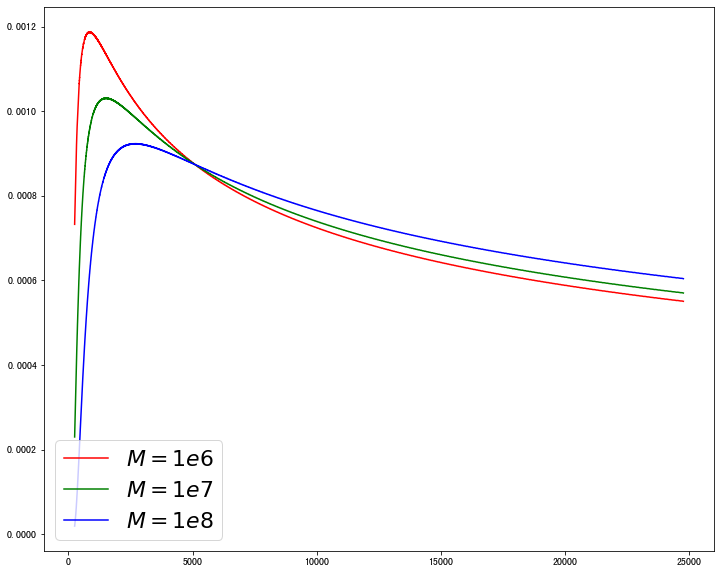

In [9]:
pars=[1e6,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e8,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
fig = plt.figure(figsize=(12, 10))
plt.plot(xmin,flux1*txmin/(dx*flux1[1312]),color = 'r',label=r'$M = 1e6$')
plt.plot(xmin,flux2*txmin/(dx*flux2[1312]),color = 'g',label=r'$M = 1e7$')
plt.plot(xmin,flux3*txmin/(dx*flux3[1312]),color = 'b',label=r'$M = 1e8$')
#plt.xlim([3000,8000])
plt.legend(loc='lower left',fontsize=22,numpoints=1)
plt.show()

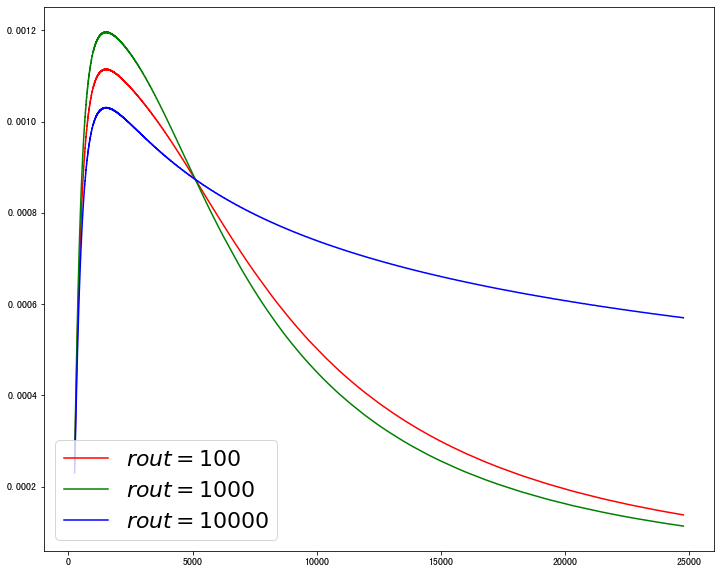

In [11]:
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,-1,10,1,0.0]
flux1 =[]
callModelFunction('agnsed',x.tolist(),pars,flux1)
flux1=np.array(flux1)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,3,10,1,0.0]
flux2 =[]
callModelFunction('agnsed',x.tolist(),pars,flux2)
flux2=np.array(flux2)[::-1]
pars=[1e7,10,-1,0.0,np.cos(np.pi/6.),100,0.2,1.7,2.7,6,6,5,10,1,0.0]
flux3 =[]
callModelFunction('agnsed',x.tolist(),pars,flux3)
flux3=np.array(flux3)[::-1]
fig = plt.figure(figsize=(12, 10))
plt.plot(xmin,flux1*txmin/(dx*flux1[1312]),color = 'r',label=r'$rout = 100$')
plt.plot(xmin,flux2*txmin/(dx*flux2[1312]),color = 'g',label=r'$rout = 1000$')
plt.plot(xmin,flux3*txmin/(dx*flux3[1312]),color = 'b',label=r'$rout = 10000$')
#plt.xlim([3000,8000])
plt.legend(loc='lower left',fontsize=22,numpoints=1)
plt.show()

In [96]:
m1=Model("powerlaw")
par_bb=[]
par_bb.append('init')
lenpar=2
for loopp in range(lenpar):
    par_bb.append(m1(loopp+1))

In [97]:
par_bb[1].values=2
par_bb[2].values=1

In [92]:
Xset.parallel.walkers=1
Xset.parallel.leven=16
Fit.query = "yes"
try:
    Fit.perform()
    Fit.statMethod='chi'
    Chi_r=Fit.statistic/Fit.dof
except Exception:
    Chi_r=np.nan

In [93]:
Plot.device = "/xs"
Plot.xAxis = "keV"
Plot.add = True
Plot.xLog = True
Plot.yLog = True

In [98]:
Plot('eeufspec')
xrayxdata=np.array(Plot.x(1))
xrayxerr=np.array(Plot.xErr(1))
xrayydata=np.array(Plot.y(1))
xrayyerr=np.array(Plot.yErr(1))
xraymo=np.array(Plot.model(1))
        

In [105]:
sta=np.log(0.5)
sto=np.log(3.)
step=(sto-sta)/2000
xx=np.arange(sta,sto,step)
x=np.exp(xx)
txmin = 0.5*(x[1:2000]+x[0:1999])
xx=spe.hc2/x
xx = xx[::-1]
dx = xx[1:2000]-xx[0:1999]
xmin = 0.5*(xx[1:2000]+xx[0:1999])
flux =[]
pars=[2]
callModelFunction('powerlaw',x.tolist(),pars,flux)

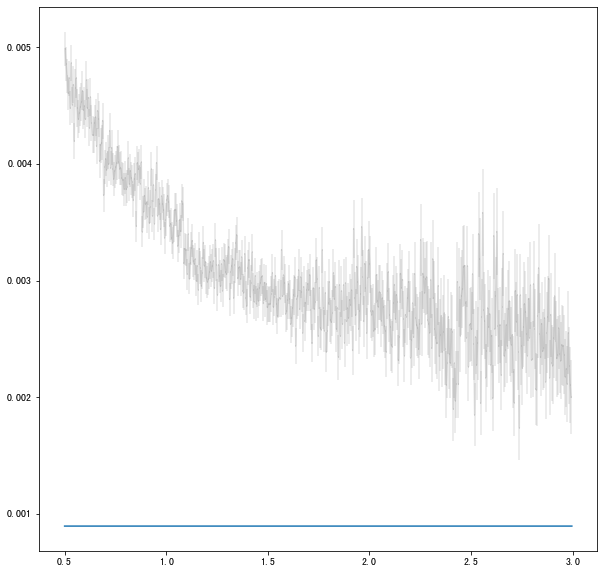

In [108]:
fig = plt.figure(figsize=(10, 10))
plt.errorbar(xrayxdata,xerr=xrayxerr,y=xrayydata,yerr=xrayyerr,c='grey', label='',alpha=0.2,markersize=3.)
#plt.plot(xrayxdata,xraymo)
plt.plot(txmin,flux*txmin)
#plt.yscale('log')
plt.show()

In [109]:
print (flux*txmin)

[0.00089588 0.00089588 0.00089588 ... 0.00089588 0.00089588 0.00089588]
